(two-means-notebook)=
# Test t di Student per campioni indipendenti 

In [23]:
import itertools
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
from scipy.stats import t
from scipy.stats import ttest_ind

In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
sns.set_theme(
    context="paper",
    palette="colorblind"
)
az.style.use("arviz-darkgrid")

Il test t di Student per due campioni indipendenti (o anche noto come t-test bilaterale) è un test statistico utilizzato per valutare se le medie di due campioni indipendenti sono significativamente diverse. Si utilizza quando i due campioni sono indipendenti, ovvero quando le osservazioni in un campione non sono correlate con le osservazioni nell'altro campione.

Il test t di Student per due campioni indipendenti si basa sulla differenza tra le medie dei due campioni e la stima della varianza della popolazione utilizzando le varianze campionarie dei due campioni. In particolare, l'ipotesi nulla è che le medie dei due campioni siano uguali, mentre l'ipotesi alternativa a due code è che le medie dei due campioni siano diverse. Il test viene eseguito calcolando la statistica t, data dalla differenza tra le medie campionarie divisa per la deviazione standard campionaria media.

Il valore della statistica t viene confrontato con la distribuzione t di Student con $n_1 + n_2 - 2$ gradi di libertà, dove $n_1$ e $n_2$ sono le dimensioni dei due campioni. Il valore-p viene quindi calcolato dalla distribuzione t per determinare la significatività del test.

Il test t di Student per due campioni indipendenti è comunemente utilizzato in molti campi della ricerca per confrontare le medie di due gruppi o condizioni.

Qui sotto viene indicato come calcolare la stima della deviazione standard *poole* che si usa per standardizzare la differenza tra le medie dei due campioni:


$$
\begin{equation}
    s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}},
\end{equation}
$$

Il valore della statistica test è 

$$
\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}
$$

Esaminiamo un caso concreto. Supponiamo di disporre di nove misure del peso per un gruppo di donne e di nove misure di peso per un gruppo di uomini. Ci chiediamo se, nella popolazione, la media del peso dei due gruppi sia diversa.

Creiamo due array con i dati e li inseriamo in un DataFrame.

In [4]:
women_weight = np.array([38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.8, 48.5])
men_weight   = np.array([67.8, 60, 63.4, 76, 89.4, 73.3, 67.3, 61.3, 62.4])

weight = np.concatenate((women_weight, men_weight))
print(weight)

[38.9 61.2 73.3 21.8 63.4 64.6 48.4 48.8 48.5 67.8 60.  63.4 76.  89.4
 73.3 67.3 61.3 62.4]


Creaiamo una variabile che specifica l'appartenenza al gruppo.

In [6]:
is_female = np.repeat([1, 0], 9)
is_female

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
df = pd.DataFrame({"is_female": is_female, "weight": weight})
df


,is_female,weight
0,1,38.9
1,1,61.2
2,1,73.3
3,1,21.8
4,1,63.4
5,1,64.6
6,1,48.4
7,1,48.8
8,1,48.5
9,0,67.8


Qui sotto è riportato un istogramma con la distribuzione dei dati di tutto il campione.

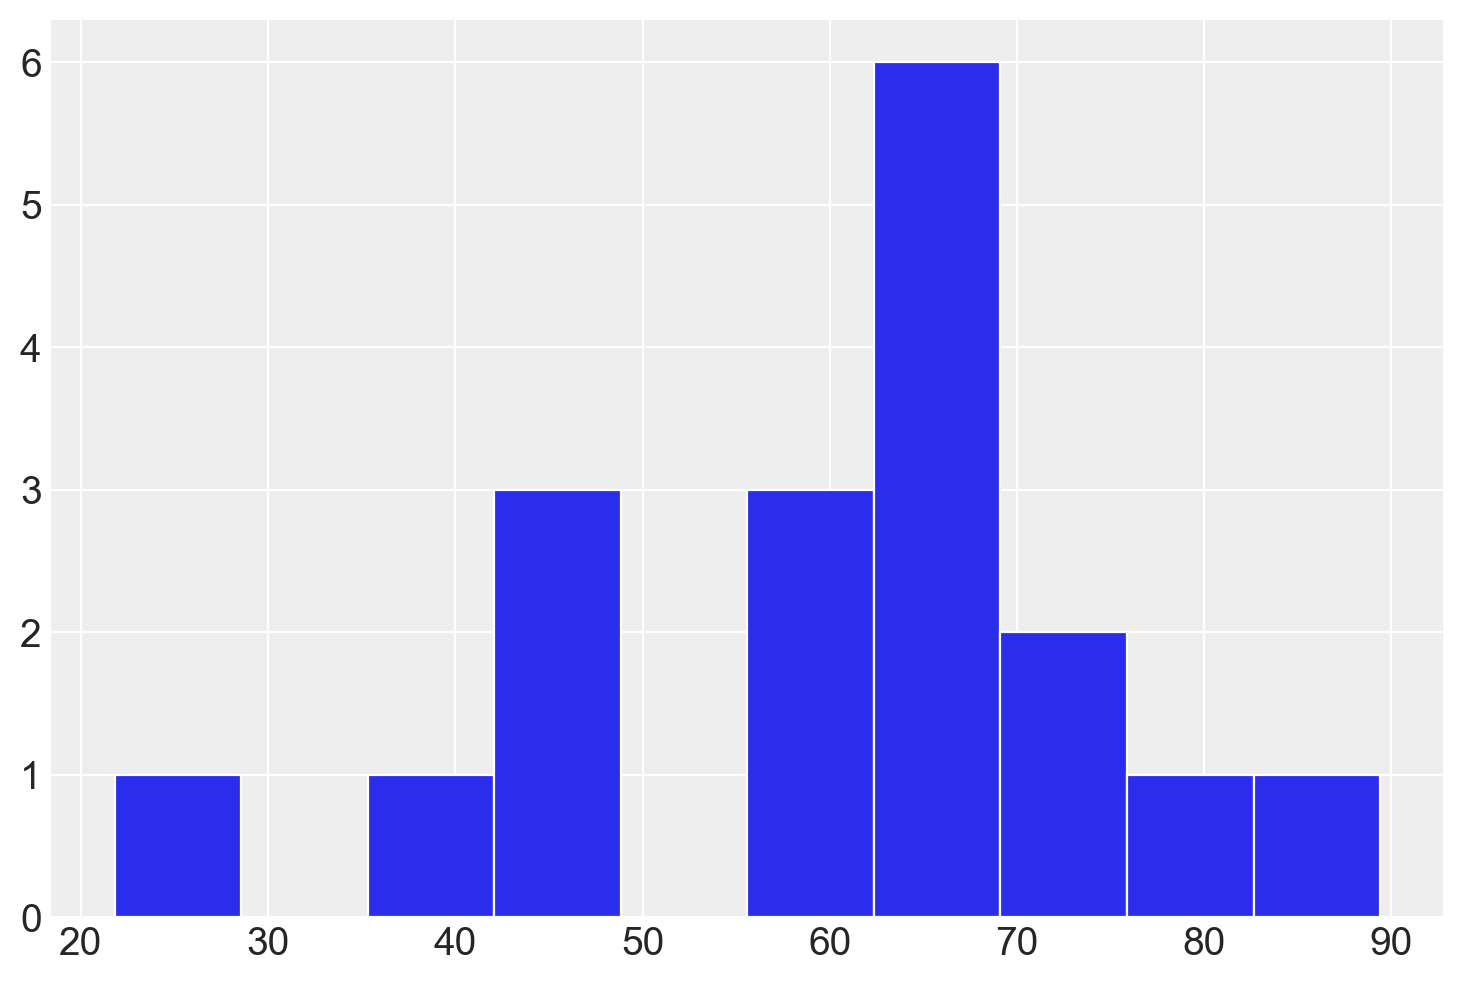

In [13]:
_ = df['weight'].hist()

Estraiamo dal DataFrame due array, ciascuno con i valori del peso di ciascun gruppo.

In [18]:
weight_f = df.loc[df['is_female'] == 1, 'weight']
weight_m = df.loc[df['is_female'] == 0, 'weight']

Calcoliamo la deviazione standard *pooled*.

In [21]:
s_pool_num = np.sum(
    [
        (len(weight_f) - 1) * np.std(weight_f, ddof=1) ** 2,
        (len(weight_m) - 1) * np.std(weight_m, ddof=1) ** 2,
    ]
)
s_pool_denom = len(weight_f) + len(weight_m) - 2

s_pool = np.sqrt(np.divide(s_pool_num, s_pool_denom))
s_pool


12.86771368796942

Calcoliamo la statistica test.

In [22]:
t_num = np.mean(weight_f) - np.mean(weight_m)
t_denom = s_pool * np.sqrt(1/len(weight_f) + 1/len(weight_m))
t_man = np.divide(t_num, t_denom)
t_man

-2.7842353699254567

Rifacciamo ora i calcoli con `ttest_ind`.

In [24]:
ttest_ind(weight_f, weight_m)

Ttest_indResult(statistic=-2.7842353699254567, pvalue=0.013265602643801042)

Il risultato conferma quanto trovato in precedenza attraverso i calcoli effettuati. Il valore di $p$ suggerisce che possiamo rifiutare l'ipotesi nulla di uguaglianza delle medie delle due popolazioni. Quindi, possiamo concludere con un livello di confidenza del 95% che la media del peso dei maschi nella popolazione è superiore alla media del peso delle femmine nella popolazione.